[0.00000000e+00 2.29753086e-05 9.19012346e-05 2.06777778e-04
 3.67604938e-04 5.74382716e-04 8.27111111e-04 1.12579012e-03
 1.47041975e-03 1.86100000e-03]


/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


ValueError: Contour levels must be increasing

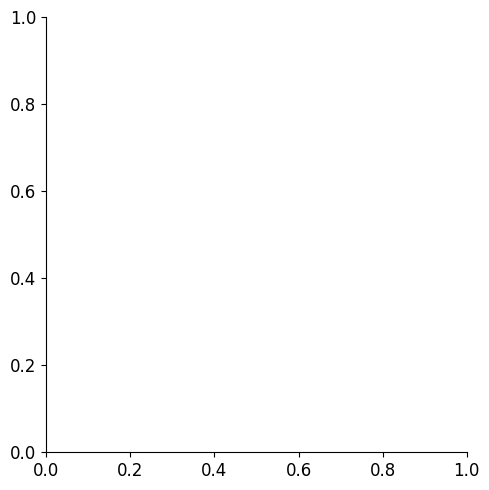

In [6]:
import matplotlib.pyplot as pl
import xarray as xr
import numpy as np
import seaborn as sns

model='SAM_UW'
hr_plot=48


pl.rcParams['xtick.labelsize'] = 12
pl.rcParams['ytick.labelsize'] = 12
pl.rcParams['axes.labelsize'] = 16
#levs=np.concatenate((np.linspace(0,0.01,20),np.linspace(0.011,1,1)))


def powspace(start, stop, power, num):
    start = np.power(start, 1/float(power))
    stop = np.power(stop, 1/float(power))
    return np.power( np.linspace(start, stop, num=num), power)
print(powspace(0,1.861e-3,2,10))


MHH_qlpath=xr.open_dataset('/fs/ess/PFS0220/eurec4a/microhh_results/2D_outputs/Feb_2nd/ql_path.xy.nc',decode_times=False)
MHH_rr_bot=xr.open_dataset('/fs/ess/PFS0220/eurec4a/microhh_results/2D_outputs/Feb_2nd/qr_path.xy.nc',decode_times=False)
MHH_qlpath['qr_path'] = MHH_qlpath['ql_path'].copy()
MHH_qlpath['qr_path'].values=MHH_rr_bot['qr_path'].values

MHH_qlpath_stacked=MHH_qlpath.isel(time=slice(64*12,66*12,24)).stack(xy=('x','y','time'))
MHH_qlpath_stacked=MHH_qlpath_stacked.where(MHH_qlpath_stacked['ql_path']>0,np.nan)


df=MHH_qlpath_stacked.to_dataframe()
df=df.dropna()

g=sns.displot(df,x="qr_path",y="ql_path",kind='kde',fill=False,cbar=False)
g.set_axis_labels('Cloud LWP $(kgm^{-1})$', 'Surface Rain Rate')
g.set_titles('')
pl.tight_layout()
pl.show()
#pl.savefig('/users/PFS0220/graghuna/Flower_MIP_Paper/Plots/Cloud_Top_base_Feb2nd_MHH_38hr.jpg',dpi=300, bbox_inches='tight')

In [4]:
MHH_qlpath_stacked


<xarray.Dataset>
Dimensions:  (xy: 1048576)
Coordinates:
  * xy       (xy) object MultiIndex
  * x        (xy) float64 75.0 75.0 75.0 75.0 ... 1.535e+05 1.535e+05 1.535e+05
  * y        (xy) float64 75.0 225.0 375.0 ... 1.532e+05 1.534e+05 1.535e+05
  * time     (xy) float64 2.304e+05 2.304e+05 2.304e+05 ... 2.304e+05 2.304e+05
Data variables:
    ql_path  (xy) float64 0.005766 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    rr_bot   (xy) float64 2.382e-09 1.531e-09 3.333e-09 ... 1.722e-09 1.6e-09